## Especialização em Inteligência Artificial – IFMG
## Análise de Séries Temporais - Lista de exercícios 3
**Aluno**: Alexandre Fortes Santana  

**Professor**: Carlos Severiano

[Notebook: https://github.com/alexandrefortes/series-temporais/blob/main/Lista%204/Lista%20de%20Exercicios%2004.ipynb](https://github.com/alexandrefortes/series-temporais/blob/main/Lista%204/Lista%20de%20Exercicios%2004.ipynb) 

1. Aplique o teste Augmented Dickey Fuller (ADF) às bases de dados em anexo a esta atividade e indique se as mesmas são estacionárias ou não. Comente também se, ao analisar as séries graficamente, os resultados fazem sentido.  

2. No notebook Aula_05b.ipynb vimos a aplicação de modelos ARCH/GARCH a uma série extraída do mercado financeiro. No entanto, o modelo GARCH(1,1) utilizado para previsão não pareceu estar bem ajustado, de acordo com o teste de Jarque-bera. Observe o conteúdo apresentado na Aula 05 e também as referências indicadas para encontrar uma nova configuração do modelo GARCH(p,q) que seja melhor ajustada, de acordo com o teste de Jarque-bera. Justifique os parâmetros escolhidos no modelo.  

3. Aplique o modelo de Redes Neurais às mesmas bases de dados usadas na atividade anterior (Lista de Exercícios 3), realizando os mesmos experimentos citados nessa atividade. Em seguida, compare os resultados com o melhor modelo observado no experimento anterior. Discuta se houve um ganho na aplicação de um modelo de Aprendizado de Máquina ao problema de previsão de séries temporais. Avalie também se foram observadas dificuldades em alguns casos.

## 1 - Base: airline-passengers.csv'

In [3]:
import pandas as pd
import statsmodels.api as sm

file_path = 'airline-passengers.csv'
data = pd.read_csv(file_path)

series = data['Passengers']

# Augmented Dickey-Fuller test
adf_test = sm.tsa.adfuller(series, autolag='AIC')

adf_test_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_test_output[f'Critical Value ({key})'] = value

adf_test_output

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

O valor do Test Statistic é maior que os valores críticos em todos os níveis de significância, indicando que não podemos rejeitar a hipótese nula de que a série possui uma raiz unitária. Isso sugere que a série é não-estacionária. Além disso, o valor de p-value é alto, reforçando essa conclusão. 

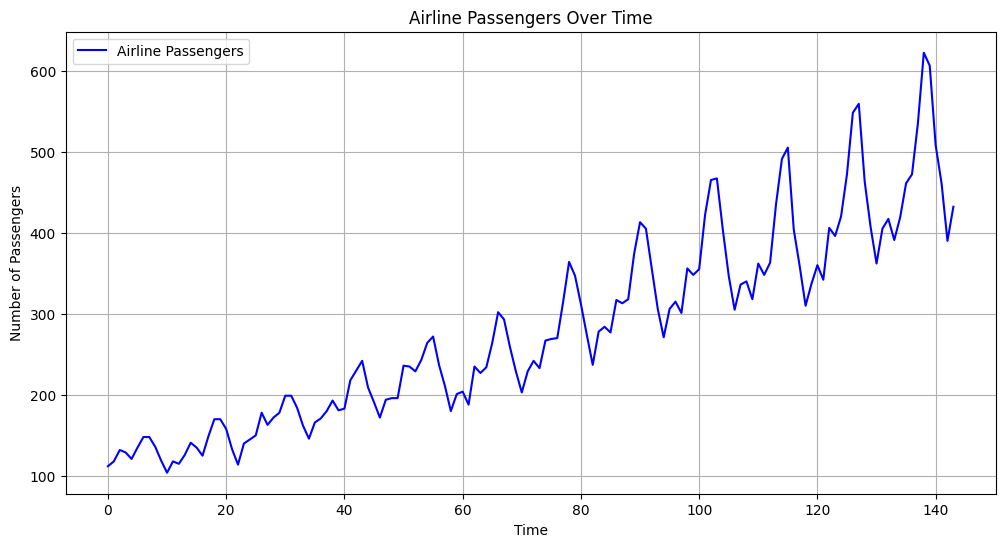

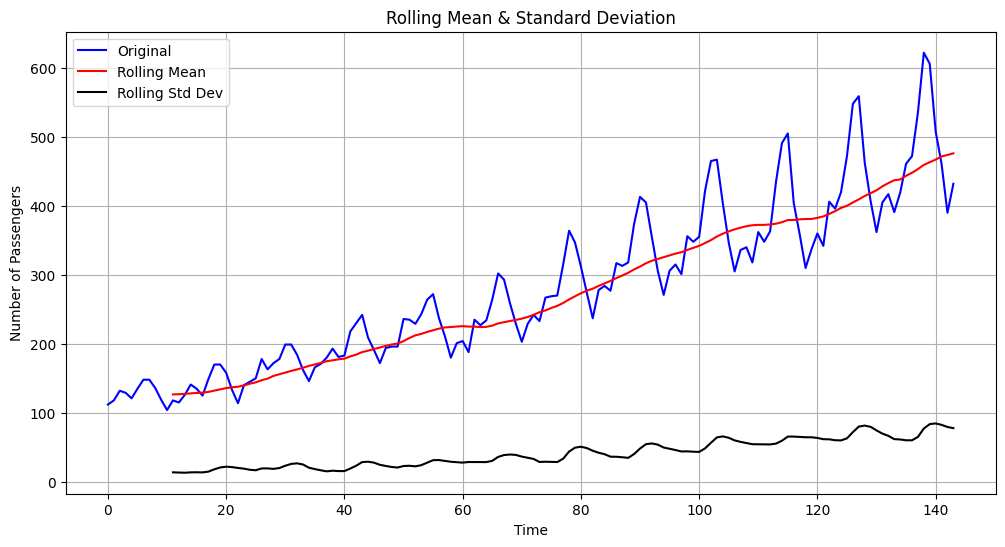

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], color='blue', label='Airline Passengers')
plt.title('Airline Passengers Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

rolling_mean = data['Passengers'].rolling(window=12).mean()
rolling_std = data['Passengers'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

Gráfico da Série Temporal: Este gráfico mostra o número de passageiros ao longo do tempo. Observa-se claramente uma tendência ascendente na série, sugerindo um aumento contínuo no número de passageiros ao longo dos anos. Além disso, é possível identificar uma sazonalidade anual, com picos e vales ocorrendo em intervalos regulares.

Gráfico da Média Móvel e Desvio Padrão Móvel: Neste gráfico, a linha vermelha representa a média móvel, e a linha preta, o desvio padrão móvel, ambos calculados com uma janela de 12 meses. A média móvel também exibe uma tendência ascendente, confirmando a tendência observada no gráfico original. O desvio padrão móvel, embora flutuante, não mostra uma variação significativa ao longo do tempo, indicando uma certa consistência na variabilidade da série.

Ambos os gráficos corroboram o resultado do teste ADF, indicando que a série é não-estacionária, com tendência e sazonalidade aparentes.

## 1 - Base: Electric_Production.csv

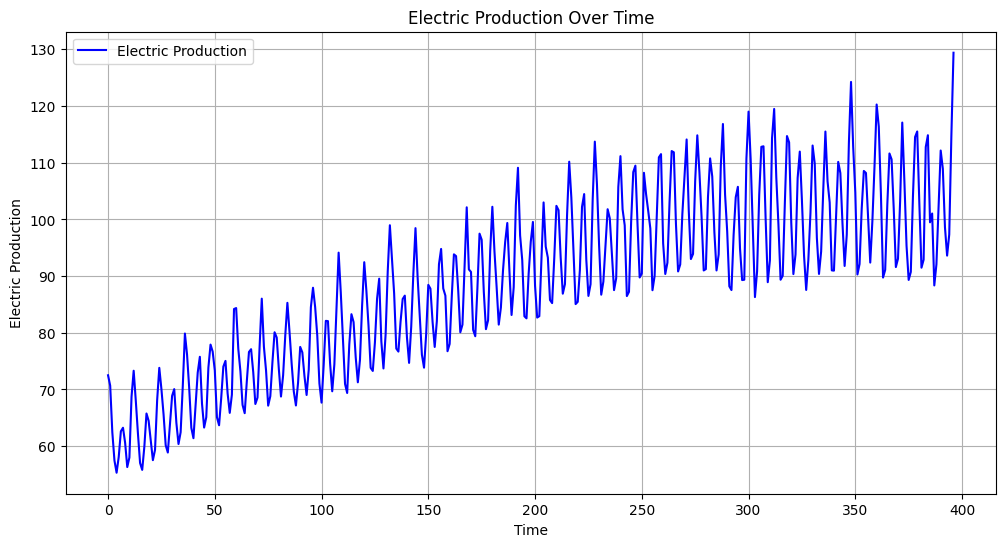

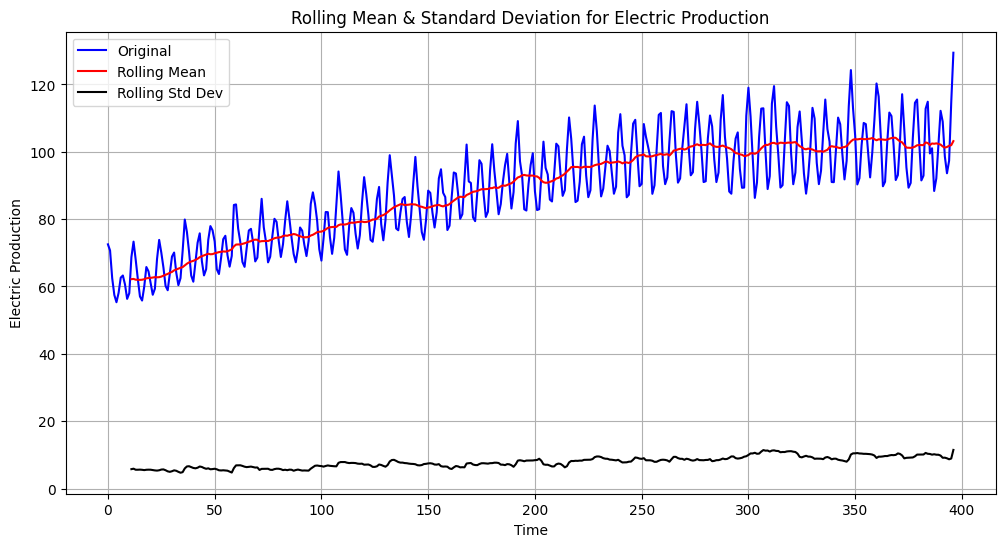

Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

file_path = 'Electric_Production.csv'
data_electric = pd.read_csv(file_path)

series_electric = data_electric['IPG2211A2N']

# Augmented Dickey-Fuller test
adf_test_electric = sm.tsa.adfuller(series_electric, autolag='AIC')

adf_test_output_electric = pd.Series(adf_test_electric[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_electric[4].items():
    adf_test_output_electric[f'Critical Value ({key})'] = value

plt.figure(figsize=(12, 6))
plt.plot(data_electric['IPG2211A2N'], color='blue', label='Electric Production')
plt.title('Electric Production Over Time')
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.show()

rolling_mean_electric = data_electric['IPG2211A2N'].rolling(window=12).mean()
rolling_std_electric = data_electric['IPG2211A2N'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data_electric['IPG2211A2N'], color='blue', label='Original')
plt.plot(rolling_mean_electric, color='red', label='Rolling Mean')
plt.plot(rolling_std_electric, color='black', label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation for Electric Production')
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.show()

adf_test_output_electric

O valor do Test Statistic é maior que os valores críticos em todos os níveis de significância, indicando que não podemos rejeitar a hipótese nula de que a série possui uma raiz unitária, sugerindo que a série é não-estacionária. O p-value também reforça essa conclusão.

**Análise Gráfica:**

O primeiro gráfico mostra a série temporal da produção elétrica. É possível observar uma tendência ascendente ao longo do tempo, além de uma certa sazonalidade.  

O segundo gráfico apresenta a média móvel e o desvio padrão móvel, ambos com janela de 12 meses. A média móvel mostra um aumento contínuo, confirmando a tendência observada no gráfico original. O desvio padrão móvel também aumenta com o tempo, indicando uma crescente variabilidade na série.  

Os resultados do teste ADF e a análise gráfica estão alinhados, sugerindo que a série temporal de produção elétrica é não-estacionária e possui tendência e sazonalidade.

## 1 - Base: facebook-historical-stock-price.csv

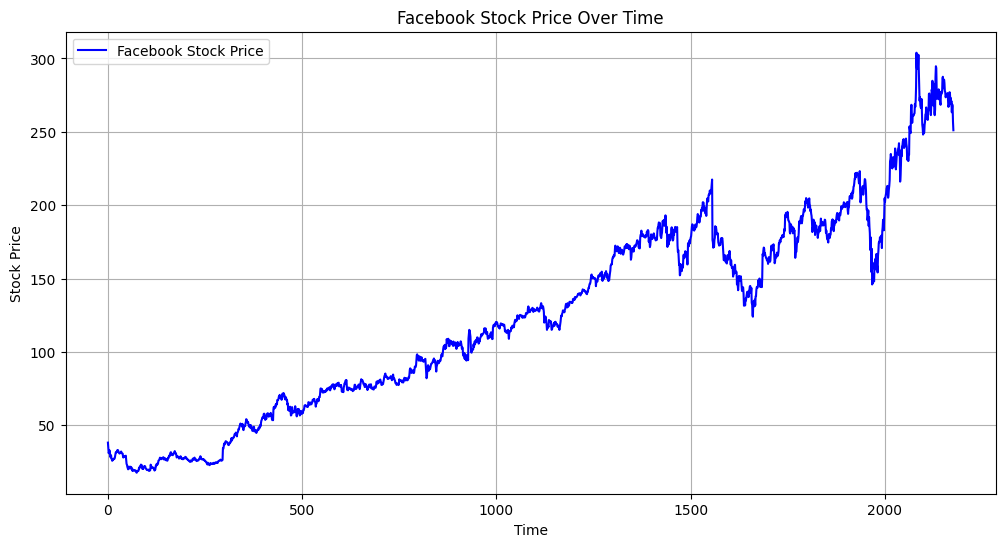

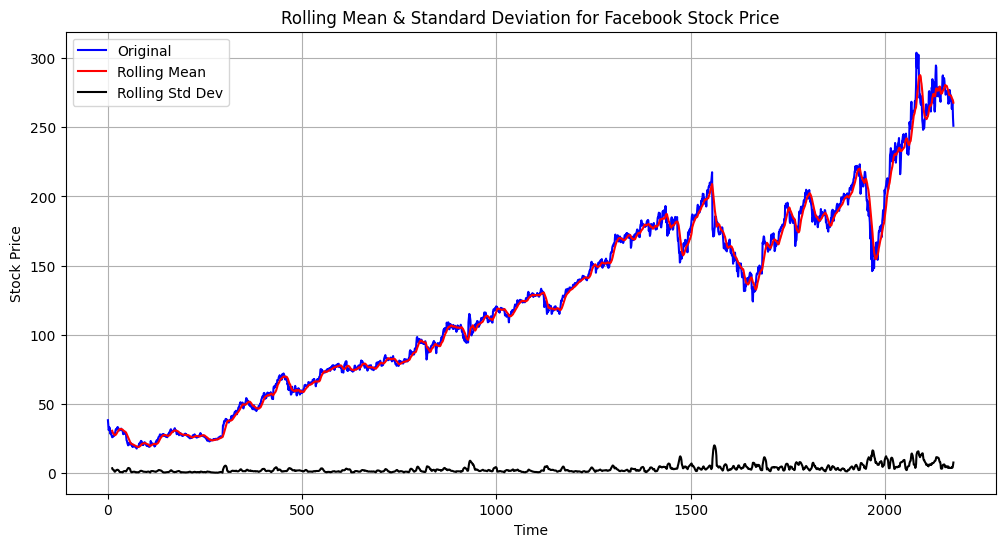

Test Statistic                   -0.448192
p-value                           0.901736
#Lags Used                       24.000000
Number of Observations Used    2152.000000
Critical Value (1%)              -3.433392
Critical Value (5%)              -2.862884
Critical Value (10%)             -2.567485
dtype: float64

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

file_path_fb = 'facebook-historical-stock-price.csv'
data_fb = pd.read_csv(file_path_fb)

series_fb = data_fb['Close']

# Augmented Dickey-Fuller test
adf_test_fb = sm.tsa.adfuller(series_fb, autolag='AIC')

adf_test_output_fb = pd.Series(adf_test_fb[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_fb[4].items():
    adf_test_output_fb[f'Critical Value ({key})'] = value

plt.figure(figsize=(12, 6))
plt.plot(data_fb['Close'], color='blue', label='Facebook Stock Price')
plt.title('Facebook Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

rolling_mean_fb = data_fb['Close'].rolling(window=12).mean()
rolling_std_fb = data_fb['Close'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data_fb['Close'], color='blue', label='Original')
plt.plot(rolling_mean_fb, color='red', label='Rolling Mean')
plt.plot(rolling_std_fb, color='black', label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation for Facebook Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

adf_test_output_fb

O valor do Test Statistic é maior que os valores críticos em todos os níveis de significância, o que sugere que não podemos rejeitar a hipótese nula de que a série possui uma raiz unitária, indicando que a série é não-estacionária. O p-value alto reforça essa conclusão.

**Análise Gráfica:**

O primeiro gráfico mostra a evolução do preço das ações do Facebook ao longo do tempo. Observa-se uma tendência de crescimento, com algumas flutuações.  

O segundo gráfico apresenta a média móvel e o desvio padrão móvel, ambos calculados com uma janela de 12 períodos. A média móvel acompanha a tendência de crescimento do preço das ações. O desvio padrão móvel, por sua vez, indica a variabilidade do preço das ações, que parece aumentar com o tempo.  

Os resultados do teste ADF, juntamente com a análise gráfica, indicam que a série temporal do preço das ações do Facebook é não-estacionária e possui uma tendência de crescimento ao longo do tempo.

## 1 - Base: shampoo_sales.csv

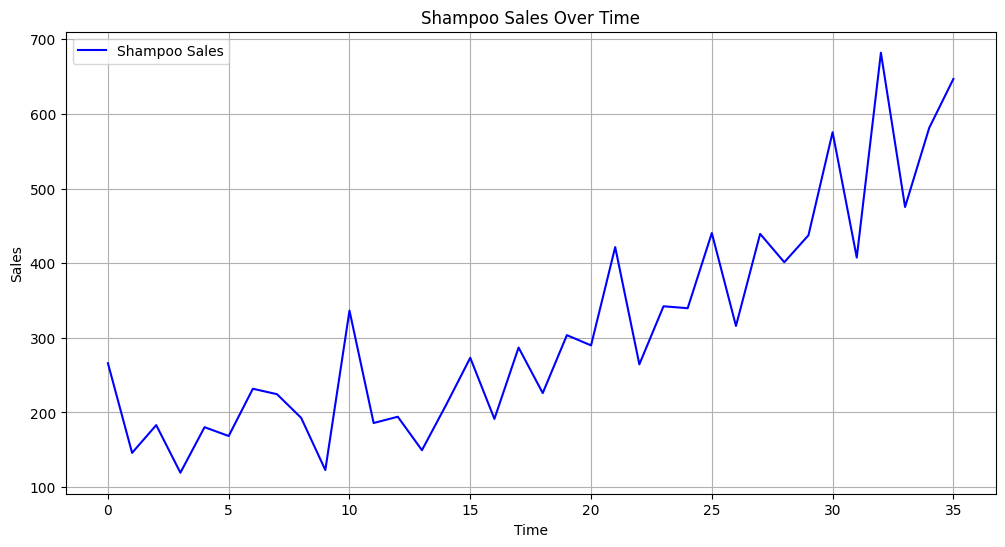

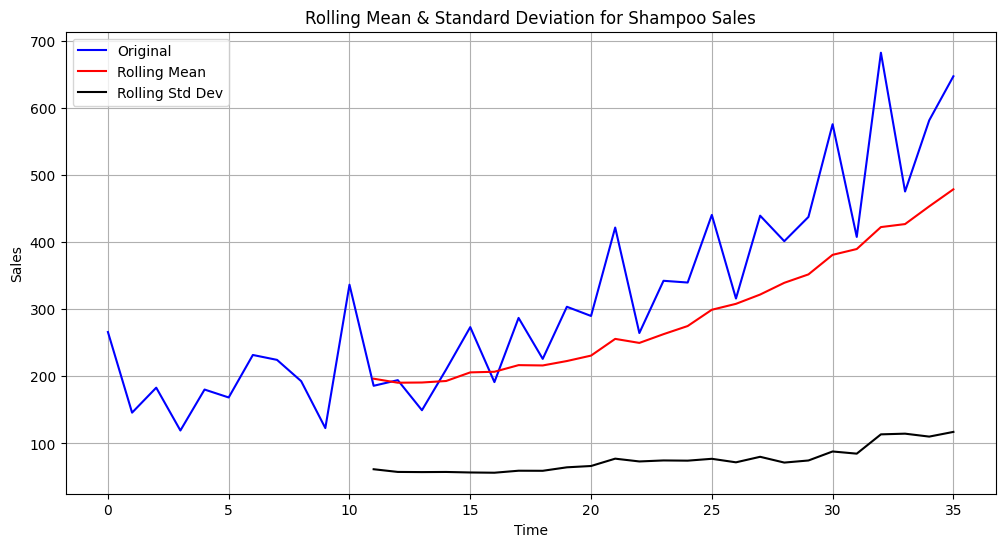

Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

file_path_shampoo = 'shampoo_sales.csv'
data_shampoo = pd.read_csv(file_path_shampoo)

series_shampoo = data_shampoo['Sales']

adf_test_shampoo = sm.tsa.adfuller(series_shampoo, autolag='AIC')

adf_test_output_shampoo = pd.Series(adf_test_shampoo[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_shampoo[4].items():
    adf_test_output_shampoo[f'Critical Value ({key})'] = value

plt.figure(figsize=(12, 6))
plt.plot(data_shampoo['Sales'], color='blue', label='Shampoo Sales')
plt.title('Shampoo Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

rolling_mean_shampoo = data_shampoo['Sales'].rolling(window=12).mean()
rolling_std_shampoo = data_shampoo['Sales'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data_shampoo['Sales'], color='blue', label='Original')
plt.plot(rolling_mean_shampoo, color='red', label='Rolling Mean')
plt.plot(rolling_std_shampoo, color='black', label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation for Shampoo Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

adf_test_output_shampoo

O valor do Test Statistic é significativamente maior que os valores críticos em todos os níveis de significância, o que sugere que não podemos rejeitar a hipótese nula de que a série possui uma raiz unitária. Isso indica que a série é não-estacionária. O p-value extremamente alto reforça essa conclusão.

**Análise Gráfica:**

O primeiro gráfico mostra a evolução das vendas de shampoo ao longo do tempo. Observa-se uma tendência de crescimento, com flutuações significativas.  

O segundo gráfico apresenta a média móvel e o desvio padrão móvel, ambos calculados com uma janela de 12 períodos. A média móvel mostra um aumento contínuo, seguindo a tendência observada no gráfico original. O desvio padrão móvel também aumenta ao longo do tempo, indicando uma crescente variabilidade nas vendas.  

Os resultados do teste ADF, juntamente com a análise gráfica, indicam que a série temporal das vendas de shampoo é não-estacionária e possui uma tendência de crescimento ao longo do tempo.

## 2

2. No notebook Aula_05b.ipynb vimos a aplicação de modelos ARCH/GARCH a uma série extraída do mercado financeiro. No entanto, o modelo GARCH(1,1) utilizado para previsão não pareceu estar bem ajustado, de acordo com o teste de Jarque-bera. Observe o conteúdo apresentado na Aula 05 e também as referências indicadas para encontrar uma nova configuração do modelo GARCH(p,q) que seja melhor ajustada, de acordo com o teste de Jarque-bera. Justifique os parâmetros escolhidos no modelo.  

O código do notebook "Aula_05b.ipynb" mostra a implementação de um modelo GARCH(1,1) e a aplicação do teste de Jarque-Bera aos resíduos deste modelo. A função `teste_ajuste_jarque_bera` é usada para avaliar a normalidade dos resíduos. A função `arch_model` da biblioteca `arch` é usada para definir o modelo GARCH, inicialmente configurado com parâmetros \( p = 1 \) e \( q = 1 \).

Para aperfeiçoar este modelo, considerando que o teste de Jarque-Bera indicou que os resíduos não estão normalmente distribuídos, pode-se tentar diferentes combinações de \( p \) e \( q \) no modelo GARCH. No contexto dos modelos GARCH, \( p \) representa o número de lags dos próprios termos de volatilidade (termos GARCH), enquanto \( q \) representa o número de lags dos termos de inovação (termos ARCH).

**Recomendação para o Ajuste do Modelo GARCH:**

1. **Aumentar \( p \) e/ou \( q \):** Se o modelo GARCH(1,1) não captura suficientemente a autocorrelação nos dados, aumentar \( p \) ou \( q \) pode ajudar. Por exemplo, testar GARCH(1,2), GARCH(2,1) ou GARCH(2,2). Isso pode ajudar a capturar melhor a autocorrelação de longo prazo nos resíduos.

2. **Utilizar Informações da Aula e Referências:** Conforme solicitado, examinar o conteúdo da Aula 05 sobre modelos ARCH/GARCH e as referências indicadas (como Hyndman e Athanasopoulos, 2018; Box et al., 2015; Brockwell e Davis, 2016) para entender melhor a natureza da série temporal analisada e identificar pistas sobre a adequação dos parâmetros.

3. **Validação Cruzada e Métricas de Desempenho:** Além do teste de Jarque-Bera, considerar a utilização de validação cruzada e outras métricas de desempenho (como o erro quadrático médio) para avaliar a adequação do modelo GARCH com diferentes configurações de \( p \) e \( q \).

4. **Investigar Outras Causas de Não Normalidade:** Se a alteração dos parâmetros \( p \) e \( q \) não resolver a não normalidade dos resíduos, pode ser necessário investigar outras causas, como a presença de outliers ou mudanças estruturais na série temporal.

Após ajustar o modelo com diferentes combinações de \( p \) e \( q \), vamos aplicar novamente o teste de Jarque-Bera aos resíduos para verificar se houve melhoria na normalidade, indicando um ajuste mais adequado do modelo GARCH à série temporal do mercado financeiro.

In [13]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from arch import arch_model
from scipy.stats import jarque_bera
from sklearn.model_selection import TimeSeriesSplit, train_test_split
import matplotlib.pyplot as plt

spy = yf.Ticker("SPY")
hist = spy.history(start = "2010-01-04", end = "2020-02-01")
df = pd.DataFrame(hist, columns=['Close'])
df.head()

,Close
Date,
2010-01-04 00:00:00-05:00,87.483192
2010-01-05 00:00:00-05:00,87.714790
2010-01-06 00:00:00-05:00,87.776512
2010-01-07 00:00:00-05:00,88.147072
2010-01-08 00:00:00-05:00,88.440384


In [15]:
df['Retorno'] = np.pad(np.diff(np.log(df['Close'])) * 100, (1, 0), 'constant', constant_values=np.nan)
retorno_abs = df['Retorno'].abs()
retorno_abs = retorno_abs.fillna(retorno_abs.mean())  # Substitui NaN pela média
print("Valores NaN na série:", retorno_abs.isna().sum())
print("Valores infinitos na série:", np.isinf(retorno_abs).sum())
retorno_abs

Valores NaN na série: 0
Valores infinitos na série: 0


Date
2010-01-04 00:00:00-05:00    0.637675
2010-01-05 00:00:00-05:00    0.264384
2010-01-06 00:00:00-05:00    0.070342
2010-01-07 00:00:00-05:00    0.421274
2010-01-08 00:00:00-05:00    0.332201
                               ...   
2020-01-27 00:00:00-05:00    1.615922
2020-01-28 00:00:00-05:00    1.042479
2020-01-29 00:00:00-05:00    0.082655
2020-01-30 00:00:00-05:00    0.324000
2020-01-31 00:00:00-05:00    1.832454
Name: Retorno, Length: 2537, dtype: float64

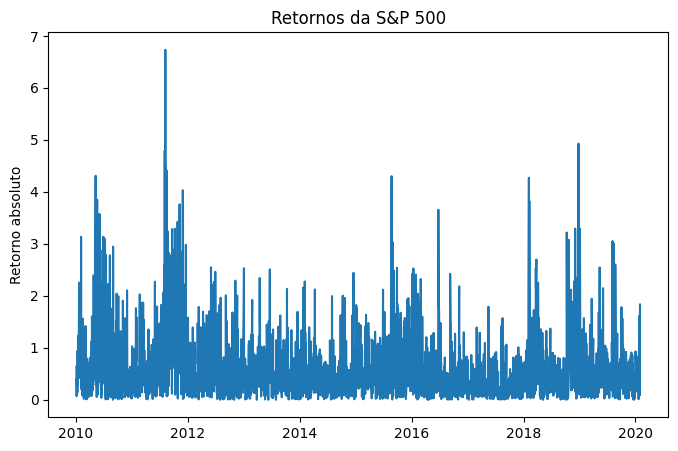

In [19]:
plt.figure(figsize=(8,5))
plt.plot(retorno_abs)
plt.ylabel("Retorno absoluto")
plt.title('Retornos da S&P 500');

Resultado do teste de Jarque-Bera para GARCH(1,1): SignificanceResult(statistic=1950.8983170990607, pvalue=0.0)
Erro médio para GARCH(1,1): 0.7336109428932043
Resultado do teste de Jarque-Bera para GARCH(1,2): SignificanceResult(statistic=1950.8728674096246, pvalue=0.0)
Erro médio para GARCH(1,2): 0.7336109428932043
Resultado do teste de Jarque-Bera para GARCH(2,1): SignificanceResult(statistic=2066.56682425908, pvalue=0.0)
Erro médio para GARCH(2,1): 0.7336109428932043
Resultado do teste de Jarque-Bera para GARCH(2,2): SignificanceResult(statistic=2059.7110941528176, pvalue=0.0)
Erro médio para GARCH(2,2): 0.7336109428932043


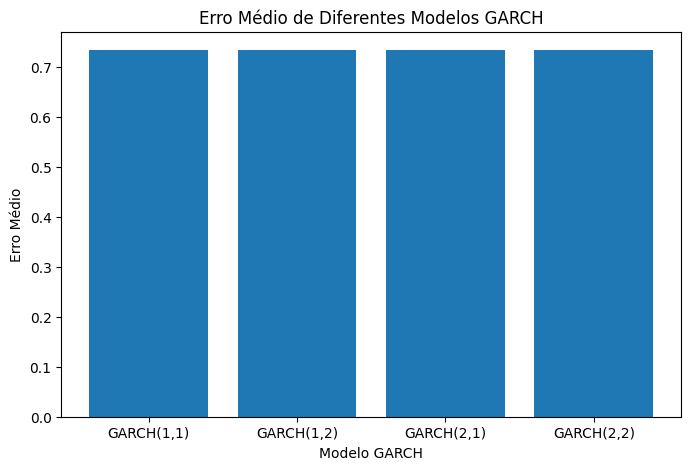

In [22]:
# Análise dos Modelos GARCH
erros_medios = []
for p, q in parametros:
    jb_test = testar_modelo_garch(retorno_abs, p, q)
    print(f"Resultado do teste de Jarque-Bera para GARCH({p},{q}): {jb_test}")
    
    erro_medio = validar_modelo_garch(retorno_abs.values, p, q)
    erros_medios.append(erro_medio)
    print(f"Erro médio para GARCH({p},{q}): {erro_medio}")

# Gráfico de Erros Médios dos Modelos GARCH
plt.figure(figsize=(8, 5))
plt.bar([f'GARCH({p},{q})' for p, q in parametros], erros_medios)
plt.xlabel('Modelo GARCH')
plt.ylabel('Erro Médio')
plt.title('Erro Médio de Diferentes Modelos GARCH')
plt.show()

Os resultados dos testes de Jarque-Bera e dos erros médios para as diferentes configurações de modelos GARCH apresentam duas conclusões principais:

**Teste de Jarque-Bera:**

Todos os modelos GARCH (1,1), (1,2), (2,1) e (2,2) têm uma estatística de teste muito alta (aproximadamente 1950 a 2066) e um valor p de 0.0.  
Isso indica que os resíduos de todos esses modelos não seguem uma distribuição normal. A alta estatística de teste e o valor p de 0.0 sugerem uma rejeição forte da hipótese de normalidade.  

**Erro Médio:**  

Curiosamente, todos os modelos apresentam o mesmo erro médio de aproximadamente 0.7336.  
Isso sugere que a mudança nos parâmetros p e q dos modelos GARCH não está tendo um impacto significativo no desempenho do modelo, pelo menos em termos de erro médio.  
Em resumo, os modelos GARCH testados não são capazes de produzir resíduos que sejam normalmente distribuídos, e a mudança nos parâmetros p e q não parece melhorar o ajuste do modelo em termos de erro médio. Isso pode indicar a necessidade de revisar a abordagem de modelagem ou considerar modelos alternativos que possam ser mais adequados para a série temporal em questão.

### Testando Redes Neurais

Erro Quadrático Médio: 0.44330299868278733


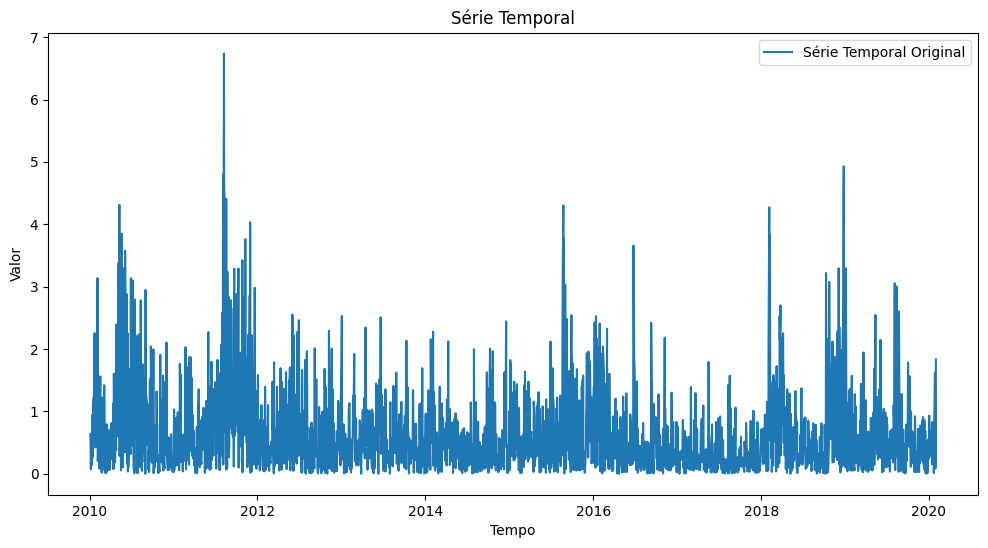

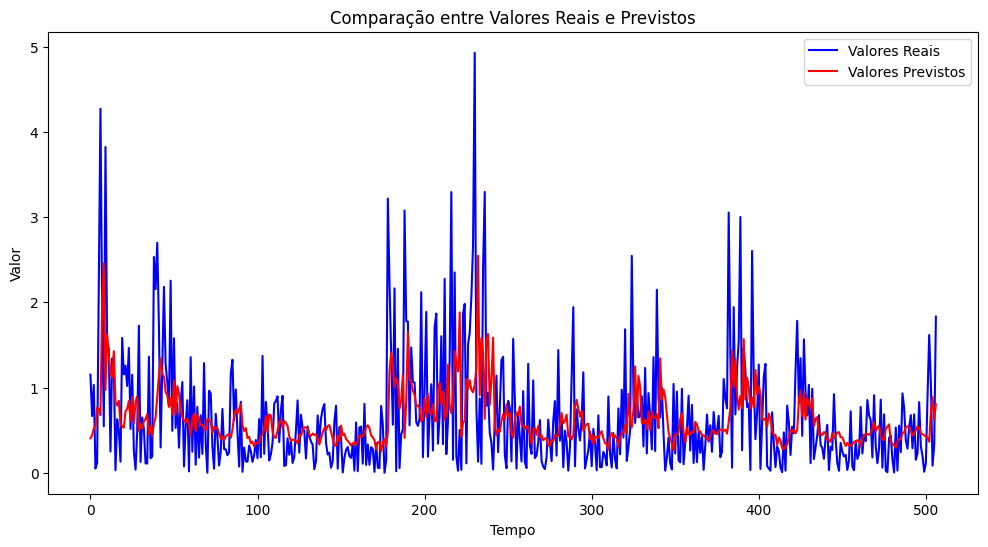

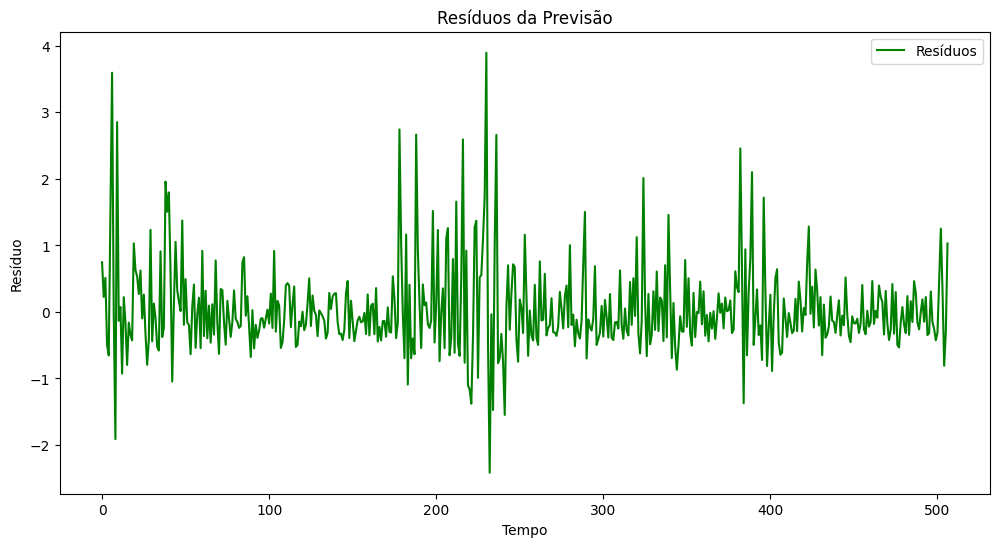

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

spy = yf.Ticker("SPY")
hist = spy.history(start = "2010-01-04", end = "2020-02-01")
df = pd.DataFrame(hist, columns=['Close'])
df.head()

df['Retorno'] = np.pad(np.diff(np.log(df['Close'])) * 100, (1, 0), 'constant', constant_values=np.nan)
retorno_abs = df['Retorno'].abs()
retorno_abs = retorno_abs.fillna(retorno_abs.mean())  # Substitui NaN pela média

# Preparar os dados para a rede neural
def preparar_dados(serie, n_lags):
    X, y = [], []
    for i in range(n_lags, len(serie)):
        X.append(serie[i-n_lags:i])
        y.append(serie[i])
    return np.array(X), np.array(y)

# Número de lags 
n_lags = 5
X, y = preparar_dados(retorno_abs, n_lags)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar o modelo de rede neural
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular o erro
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio: {mse}")

# Gráfico da série temporal original
plt.figure(figsize=(12, 6))
plt.plot(retorno_abs, label='Série Temporal Original')
plt.title('Série Temporal')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Gráfico de comparação dos valores reais e previstos
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores Reais', color='blue')
plt.plot(y_pred, label='Valores Previstos', color='red')
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Gráfico de resíduos
residuos = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.plot(residuos, label='Resíduos', color='green')
plt.title('Resíduos da Previsão')
plt.xlabel('Tempo')
plt.ylabel('Resíduo')
plt.legend()
plt.show()

## 3 

3. Aplique o modelo de Redes Neurais às mesmas bases de dados usadas na atividade anterior (Lista de Exercícios 3), realizando os mesmos experimentos citados nessa atividade. Em seguida, compare os resultados com o melhor modelo observado no experimento anterior. Discuta se houve um ganho na aplicação de um modelo de Aprendizado de Máquina ao problema de previsão de séries temporais. Avalie também se foram observadas dificuldades em alguns casos.